In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Analysing relationship between elements' various properties

In [9]:
df = pd.read_csv("elements.csv")
df.head(3)
df = df.replace(np.nan,0)
df.head()

,atomic number,symbol,name,atomic mass,CPK,electronic configuration,electronegativity,atomic radius,ion radius,van der Waals radius,...,EA,standard state,bonding type,melting point,boiling point,density,metal,year discovered,group,period
0,1,H,Hydrogen,1.00794,#FFFFFF,1s1,2.20,37.0,0,120.0,...,-73.0,gas,diatomic,14.0,20.0,0.00009,nonmetal,1766,1,1
1,2,He,Helium,4.002602,#D9FFFF,1s2,0.00,32.0,0,140.0,...,0.0,gas,atomic,0.0,4.0,0.00000,noble gas,1868,18,1
2,3,Li,Lithium,6.941,#CC80FF,[He] 2s1,0.98,134.0,76 (+1),182.0,...,-60.0,solid,metallic,454.0,1615.0,0.54000,alkali metal,1817,1,2
3,4,Be,Beryllium,9.012182,#C2FF00,[He] 2s2,1.57,90.0,45 (+2),0.0,...,0.0,solid,metallic,1560.0,2743.0,1.85000,alkaline earth metal,1798,2,2
4,5,B,Boron,10.811,#FFB5B5,[He] 2s2 2p1,2.04,82.0,27 (+3),0.0,...,-27.0,solid,covalent network,2348.0,4273.0,2.46000,metalloid,1807,13,2


### Aim 
The aim of the this analysis is to identify relationship between various properties and use this relation to create regression model. This model can later be used to prodict the value of dependent variable. 

In this case we are taking __melting point__ as our dependent variable. Now we will identify relationship between melting point and other properties by plotting the data in a graph

In [33]:
import matplotlib
# Basic method for plotting the data into a graph.
# Note - we are only taking on feature at a time
font = {'family' : 'normal',
        'weight' : 'light',
        'size'   : 10}
matplotlib.rc('ytick', labelsize=5) 

def showRelationship(feature, target, df):
    plt.figure(figsize=(10,10))
    plt.scatter(df[feature], df[target], color="blue")
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()
    

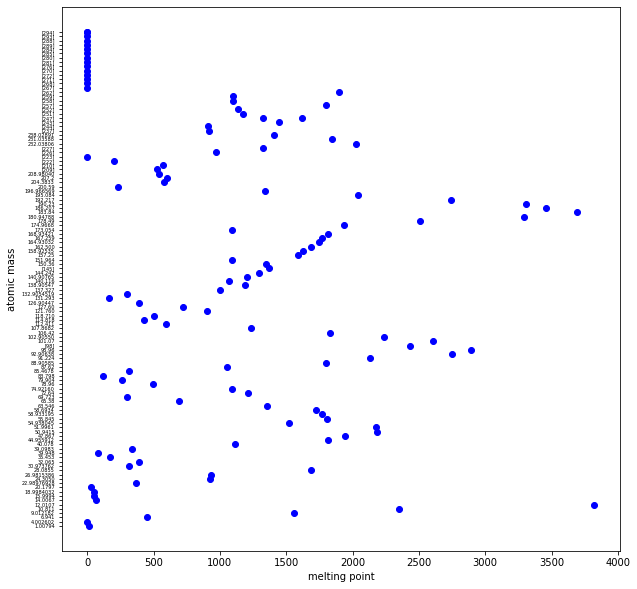

In [35]:
showRelationship("melting point","atomic mass", df)

From the above graph we can see that data is scattered throughout the graph, and shows no strong relationship between melting point and atomic mass. There are some cases where elements with higher atomic mass have lower boiling point. On the other hand, some elements with lower atomic mass also have lower boiling point. Thus there is no linear as well as non linear relationship between this two features.

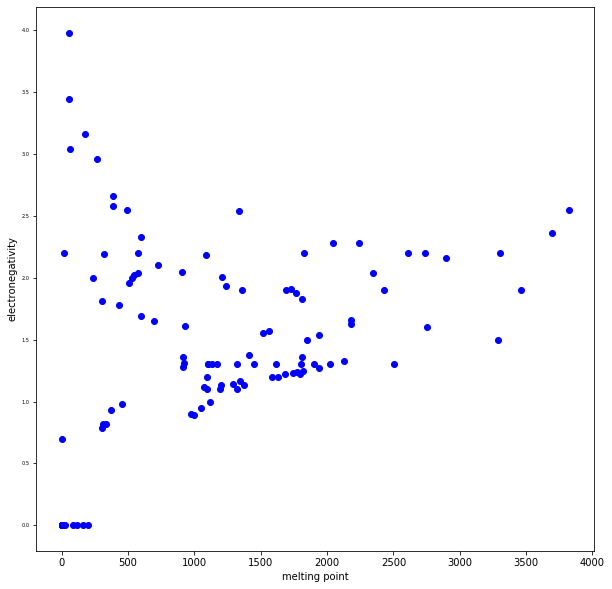

In [36]:
showRelationship("melting point", "electronegativity", df)

In this graph, there is some sign of non linear relationship, as the electronegativity is decreasing, the melting point is increasing. However after reaching a point in the value of electronegativity, the melting point is decresing with the decrease in electronegativity. 

The above graph shows quadratic relationship, but its not very strong as there are some instances which are disturbing this pattern (lower left corner)

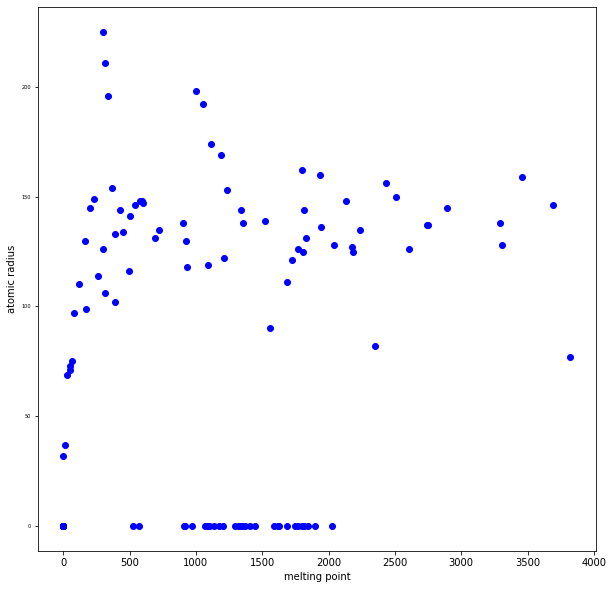

In [37]:
showRelationship("melting point", "atomic radius", df)

The above graph shows exponential relationship between melting point and atomic radius. The value of atomic mass initially increasing exponentially then becomes linear after reaching a threshold value. However there is some data at the bottom of the graph which distort this relationship. 

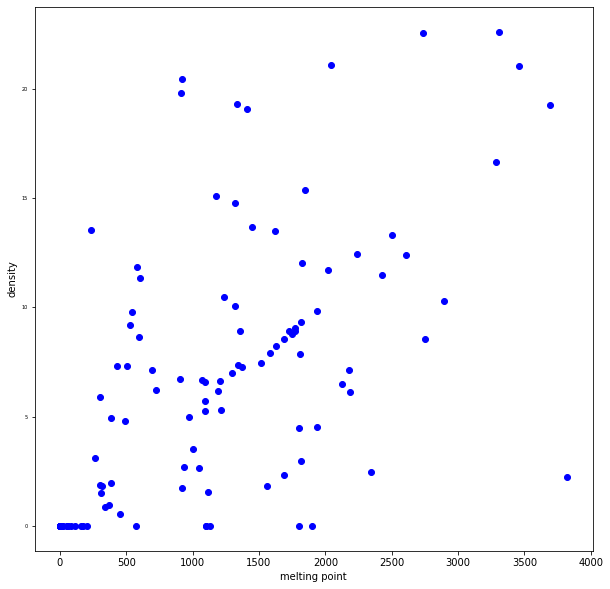

In [38]:
showRelationship("melting point", 'density', df)

This graph shows a very weak linear relationship between melting point and density. The data is scattered throughout the graph. 

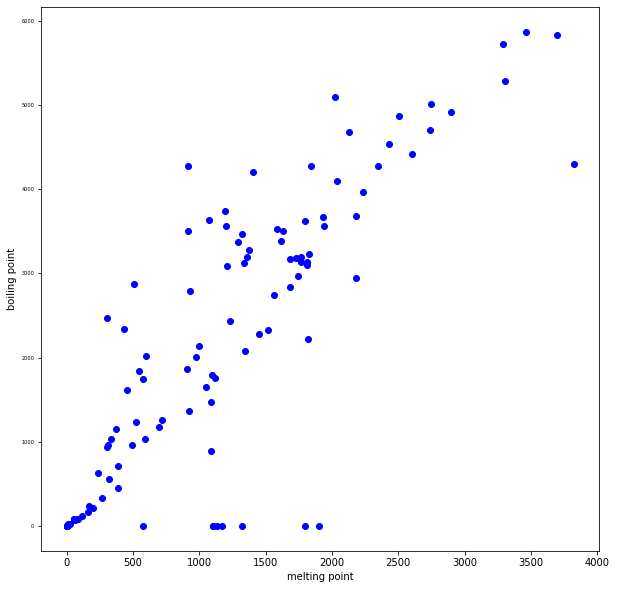

In [40]:
showRelationship("melting point", 'boiling point', df)

This graph shows linear relationship between melting point and boiling point. As the melting point is increasing, boiling point is also increases (if we ignore some cases). There is a chance we can use linear regression to predict melting point of a new element. 

#### Linear regression model 
feature = boiling point  
target = melting point

<p style="text-align: center;">The mathematic model of linear regression is an equation of straight line</p>

-------

\begin{equation*}
\hat y = \theta_0 + \theta_1x
\end{equation*}

------- 

Where $\theta_0$ and $\theta_1$ are parameters called intercept and coefficient respectively, and $\hat y$ and $x$ are predicted value and independent variable's value respectively. When we fit our model, we find the best value for this parameters using least square method, i.e. we find the value which has least square error between predicted and actual data. 


coefficient : [[0.44535575]]
intercept : [204.9547756]


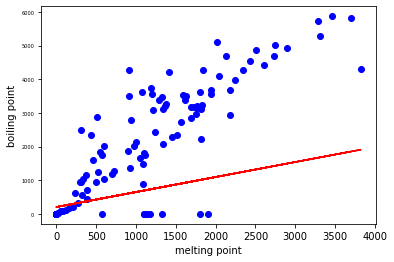

Mean Absolute Error (MAE) : 341.95058064494924
R2-score : 0.5830409103755865


In [51]:
# Divide the data into train and test

msk = np.random.rand(len(df)) <.8
train = df[msk]
test = df[~msk]

train_x = np.asanyarray(train[['boiling point']])
train_y = np.asanyarray(train[['melting point']])
test_x = np.asanyarray(test[['boiling point']])
test_y = np.asanyarray(test[['melting point']])

# Training the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x, train_y)
print("coefficient : {}".format(model.coef_))
print("intercept : {}".format(model.intercept_))

# Plotting the fitted line
plt.scatter(df['melting point'], df['boiling point'], color="blue")
plt.plot(df['melting point'], model.intercept_[0]+model.coef_[0]*df['melting point'], '-r')
plt.xlabel("melting point")
plt.ylabel("boiling point")
plt.show()

# Evaluting the model with different metrics
from sklearn.metrics import r2_score

y_hat = model.predict(test_x)

print("Mean Absolute Error (MAE) : {}".format(np.mean(np.absolute(y_hat - test_y))))
print("R2-score : {}".format(r2_score(y_hat, test_y)))


As we know that as r2 score get closer to 1, the model's accuracy increases. In this case the r2-score is around 0.50, which shows that it is 50% accurate. 

From the graph, we can see that it does not align with the data, thus it is not a good model. Therefore boiling point and melting point does not has strong linear relationship. 

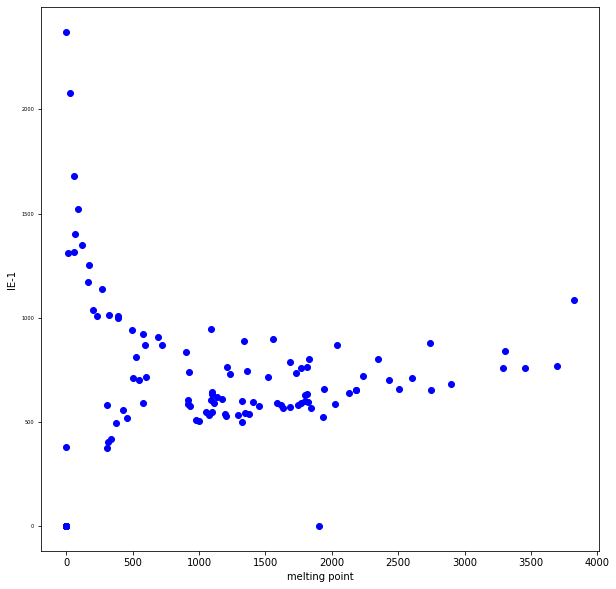

In [54]:
showRelationship("melting point", "IE-1", df)

#### Non linear regression model - using quadratic equation 
feature = IE-1  
target = melting point

<p style="text-align: center;">The mathematic model of quadratic regression is a quadratic equation</p>

-------

\begin{equation*}
\hat y = \theta_2x^2 + \theta_1x + \theta_0
\end{equation*}

------- 

where $\theta_0$ is intercept and $\theta_1$ and $\theta_2$ are coefficients, and $\hat y$ and $x$ are dependent and independent variables. 

In [120]:
# quadratic equation
def quadraticFunction(x, beta1, beta2):
    return beta1*x + beta2*(x**2)+1

Lets first see what a quadratic equation look like in graph 

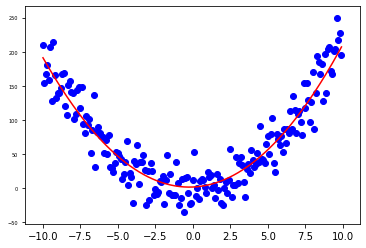

(200,)


In [123]:
x = np.arange(-10.0, 10.0, 0.1)
y = quadraticFunction(x, 1, 2)
y_noise = y+ (np.random.normal(size=x.size)*22)

plt.plot(x, y , '-r')
plt.scatter(x, y_noise, color="blue")
plt.show()
print(x.shape)

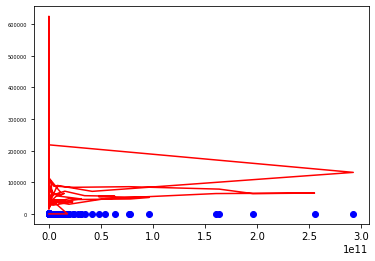

beta 0 : -4.221442
 beta 1 : 3.802010
 beta 2 : 3.802010


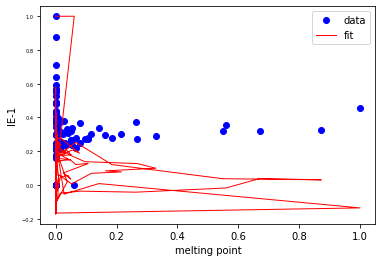

r2 score : -0.619910


In [126]:
# Extract feature and target

xdata = df['IE-1'].values
ydata = df['melting point'].values

# Try to plot our model with the data

plt.scatter(ydata, xdata, color="blue")
plt.plot(ydata, quadraticFunction(xdata, 0.1, 0.1111), '-r')
#print(quadraticFunction(ydata, 0.1, 0.111))
plt.show()

# normalise our data
xdata = xdata/np.max(xdata)
ydata = ydata/np.max(ydata)

# find value of the parameters using least square method
from scipy.optimize import curve_fit
parameters, pcov = curve_fit(quadraticFunction, xdata, ydata)
print("beta 0 : %f\n beta 1 : %f\n beta 2 : %f" %(parameters[0], parameters[1], parameters[1]))

# Evaluating the model by plotting aganist the data
y = quadraticFunction(xdata, *parameters)
plt.plot(ydata, xdata,'ro', color='blue', label="data")
plt.plot(ydata, y, '-r', linewidth=1.0, label="fit")
plt.xlabel("melting point")
plt.legend()
plt.ylabel("IE-1")
plt.show()

from sklearn.metrics import r2_score

print("r2 score : %f"%(r2_score(y, ydata)))